In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Carga dos dados

In [76]:
# Abrir o dataset
df_pontuacao = pd.read_csv('datasets/pontuacao_teste.csv')

In [77]:
# Chegar estrutura do dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [78]:
# visualizar Topo do DF
df_pontuacao.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [79]:
# visualizar Final do DF
df_pontuacao.tail()

,horas_estudo,pontuacao_teste
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


# EDA

In [80]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

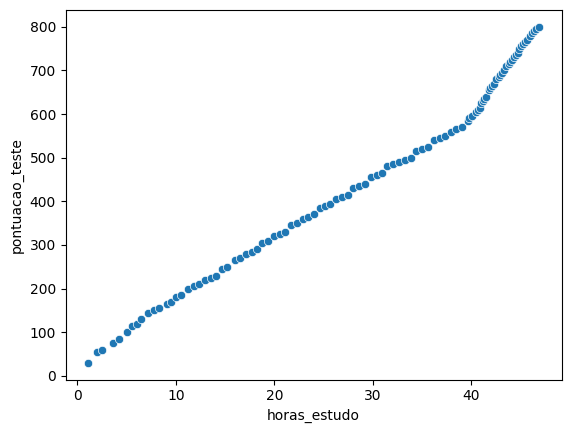

In [81]:
# Plot de dispersão
# X = Horas de estudo
# y = Pontuação
sns.scatterplot(x='horas_estudo', y='pontuacao_teste', data=df_pontuacao)

<Axes: ylabel='horas_estudo'>

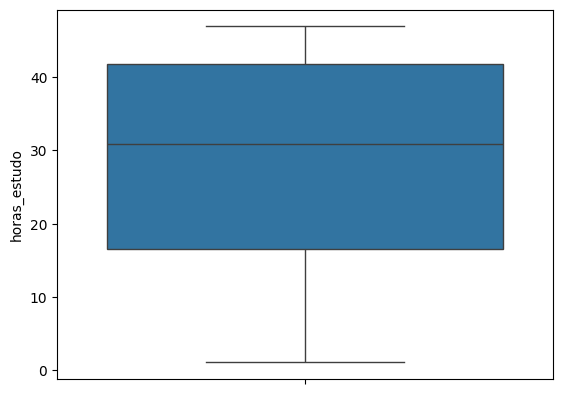

In [82]:
# Verificar se temos outliers
sns.boxplot(data=df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

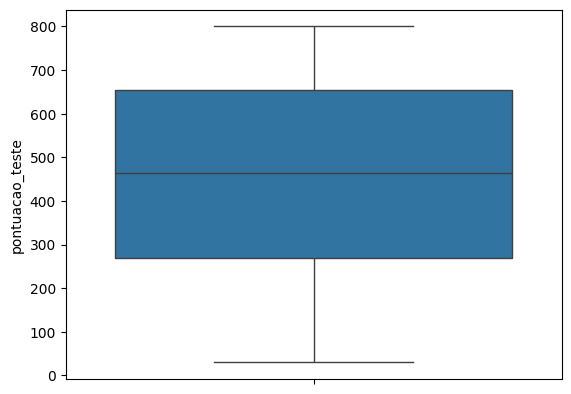

In [83]:
# Verificar se temos outliers
sns.boxplot(data=df_pontuacao, y='pontuacao_teste')

<Axes: >

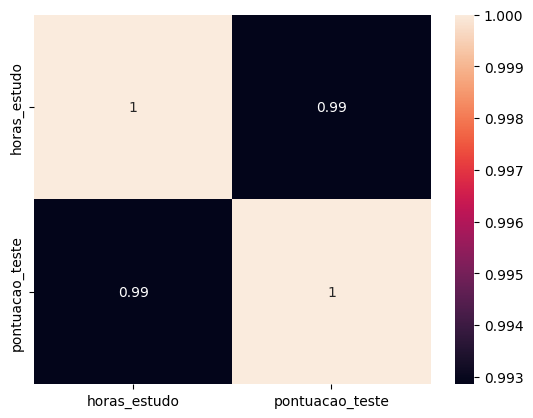

In [84]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

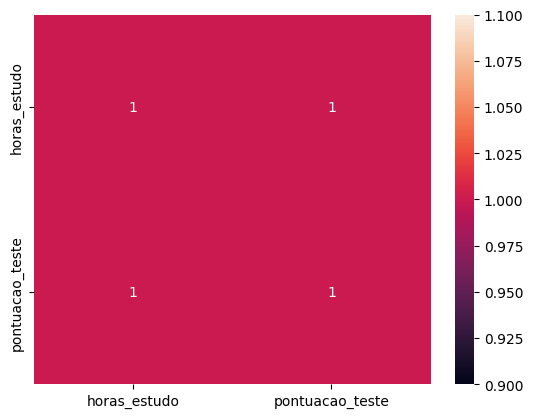

In [85]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

<Axes: xlabel='horas_estudo', ylabel='Count'>

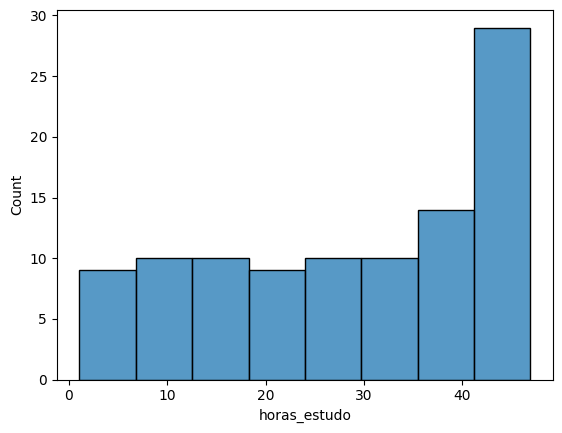

In [86]:
# Histograma das variáveis
# sns.histplot(df_pontuacao['horas_estudo']) ou
sns.histplot(df_pontuacao, x='horas_estudo')


<Axes: xlabel='pontuacao_teste', ylabel='Count'>

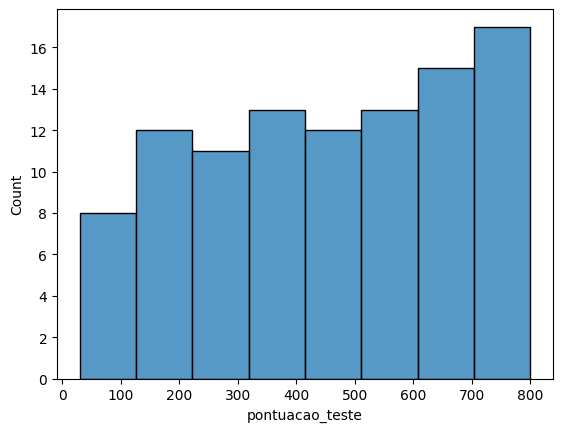

In [87]:
# Histograma das variáveis
# sns.histplot(df_pontuacao['horas_estudo']) ou
sns.histplot(df_pontuacao, x='pontuacao_teste')

# Treinar modelo

In [88]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape do array

X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# Instanciar o modelos a ser treindo
reg_model = LinearRegression()

In [90]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [91]:
# Imprimir a equação da reta
# y = ax + b
print("A equação da reta é: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é: y = 15.598138x + 7.753565


### Validar Modelo - Métricas

In [92]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [93]:
# Calcular métrica R-squared ou coeficiente de determinação
# R2 representa a proporção da variância para a variável dependente que é explicada pela variável independente
# reg_model.score(X_test, y_test) ou
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
r2_score(y_test, y_pred)

0.988458537799189

In [94]:
# Calcular métrica Mean Absolute Error (MAE)
# MAE = Média (|y - y_pred|)
# É uma métrica fácil de entender, porque é o erro médio
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

18.911466057520023

In [95]:
# Caluclar métrica MSE - Mean Squared Error
# MSE = Média((y - y_pred)²)
# Não é fácil de interpretar, porque o erro é quadrático
# É uma métrica que penaliza mais os outliers
mean_squared_error(y_test, y_pred)

602.0734063884337

In [96]:
# Calcular métrica RMSE - Root Mean Squared Error
# RMSE = sqrt(MSE)
# É uma métrica que penaliza mais os outliers porém é mais fácil de interpretar
root_mean_squared_error(y_test, y_pred)

24.537184157690827

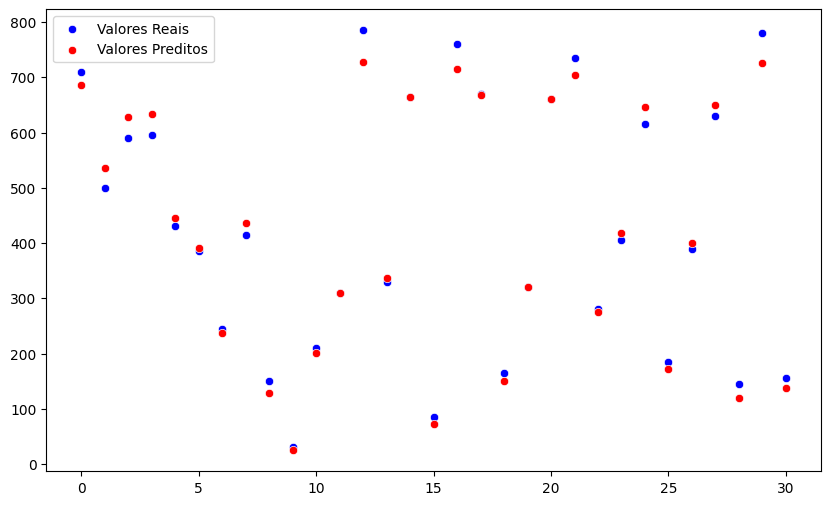

In [100]:
# Análise gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='b', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='r', label='Valores Preditos')
plt.legend()
plt.show()


### Análise de Resíduos

In [101]:
# Calcular residios - Diferença entre o valor real e o valor predito
residuos = y_test - y_pred

In [103]:
residuos

array([[ 23.72742762],
       [-36.53044666],
       [-38.55946142],
       [-38.23890285],
       [-14.50143189],
       [ -6.46776236],
       [  7.95380479],
       [-21.70236284],
       [ 20.58095765],
       [  5.08848289],
       [  8.82952241],
       [ -0.35744426],
       [ 56.61245476],
       [ -6.87427903],
       [  0.56482096],
       [ 11.73425479],
       [ 45.65077905],
       [  2.44519334],
       [ 15.30337812],
       [  0.28367288],
       [ -1.31555142],
       [ 31.56947572],
       [  5.51827336],
       [-12.98459713],
       [-30.71741333],
       [ 13.46598479],
       [-10.82664522],
       [-20.39685476],
       [ 24.93984051],
       [ 54.73208238],
       [ 17.7818886 ]])

In [102]:
# Calcular os residuos padronizados (standardization)
# Para cada elemento de um conjunto de dados, a pontuação padrão informa quantos desvios padrão ele está longe da média
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)

In [104]:
residuos_padronizados

array([[ 0.83426731],
       [-1.64631917],
       [-1.72984596],
       [-1.71664979],
       [-0.73946879],
       [-0.40875331],
       [ 0.18492752],
       [-1.03590361],
       [ 0.70473916],
       [ 0.06697316],
       [ 0.22097747],
       [-0.15721485],
       [ 2.18801825],
       [-0.42548804],
       [-0.11924872],
       [ 0.3405542 ],
       [ 1.73676794],
       [-0.04184097],
       [ 0.48748138],
       [-0.13082251],
       [-0.19665647],
       [ 1.15709447],
       [ 0.08466599],
       [-0.6770265 ],
       [-1.4070188 ],
       [ 0.41184291],
       [-0.58819186],
       [-0.98216083],
       [ 0.88417772],
       [ 2.1106105 ],
       [ 0.58951218]])

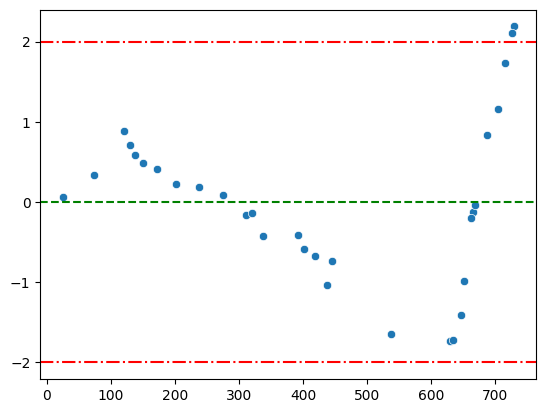

In [119]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e 2 (na escala padrão) o modelo é linear

# Verificar homocedasticidade das variáveis 
# Valores estiver em torno da reta, temos homocedasticidade, caso contrário, heterocedasticidade
# se tiver alguma tendência ou padrão (forma de cone, funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_padronizados.reshape(-1))
plt.axhline(y=0, color='g', linestyle='--')
plt.axhline(y=2, color='r', linestyle='-.')
plt.axhline(y=-2, color='r', linestyle='-.')

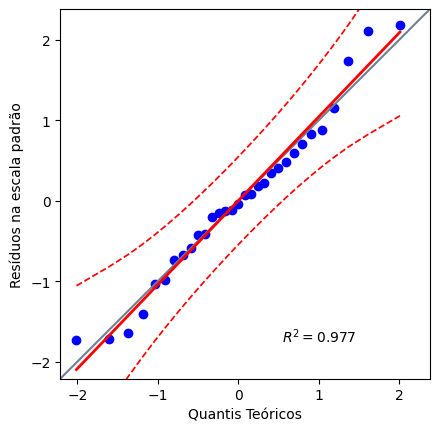

In [130]:
# Checar se os resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) plot, que avalia se os resíduos seguem uma distribuição normal
# qqplot(residuos_padronizados, line='s')
import pingouin as pg
pg.qqplot(residuos_padronizados, dist='norm', confidence=0.98)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()